In [1]:
# pip install scikit-image

In [2]:
import pickle
import main
import main_comp

%load_ext autoreload
%autoreload 1
%aimport main
%aimport main_comp

In [3]:
def save_logs(directory, logs):
    for log_name, log in logs.items():
        with open(directory + log_name, 'wb') as f:
            f.write(pickle.dumps(log))

In [4]:
def time_memory_consumption(data, path):
    with open(path, 'a') as f:
        f.write(data)

# Original NN

In [5]:
from models.skip import skip

In [6]:
input_depth = 32
n_channels = 3
skip_n33d = 128
skip_n33u = 128
skip_n11 = 4
num_scales = 5
upsample_mode = 'bilinear'
downsample_mode = 'stride'
pad = 'reflection'
act_fun = 'LeakyReLU'

In [7]:
net = skip(
    input_depth, 
    n_channels,
    num_channels_down=[skip_n33d] * num_scales,
    num_channels_up=[skip_n33u] * num_scales,
    num_channels_skip=[skip_n11] * num_scales,
    upsample_mode=upsample_mode, 
    downsample_mode=downsample_mode,
    need_sigmoid=True, 
    need_bias=True,
    pad=pad, 
    act_fun=act_fun
)
net

Sequential(
  (1): Concat(
    (0): Sequential(
      (1): Sequential(
        (0): ReflectionPad2d((0, 0, 0, 0))
        (1): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      )
      (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (1): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(32, 128, kernel_size=(3, 3), stride=(2, 2))
      )
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): LeakyReLU(negative_slope=0.2, inplace=True)
      (4): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      )
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): LeakyReLU(negative_slope=0.2, inplace=True)
      (7): Sequential(
        (1): Concat(
          (0): Sequential(
  

In [8]:
import torch
from torch.profiler import profile, record_function, ProfilerActivity

In [9]:
device = 'cuda'

In [10]:
N_ITERS = 1000

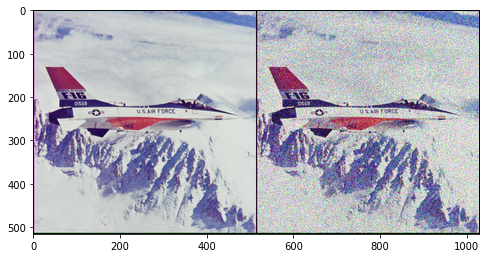

Number of params: 2217831
Starting optimization with ADAM


/home/Skoltech_MSc/TDTN/final_project/denoising_compression/main_comp.py:109: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_noisy = compare_ssim(img_noisy_np.T, out.detach().cpu().numpy()[0].T, multichannel=True)
/home/Skoltech_MSc/TDTN/final_project/denoising_compression/main_comp.py:110: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_gt = compare_ssim(img_np.T, out.detach().cpu().numpy()[0].T, multichannel=True)


Iteration 00000  Loss 0.107832  PSNR_noisy: 9.672505  PSNR_gt: 10.671729  PSNR_gt_sm: 10.671729  SSIM_noisy: 0.089180  SSIM_gt: 0.528012


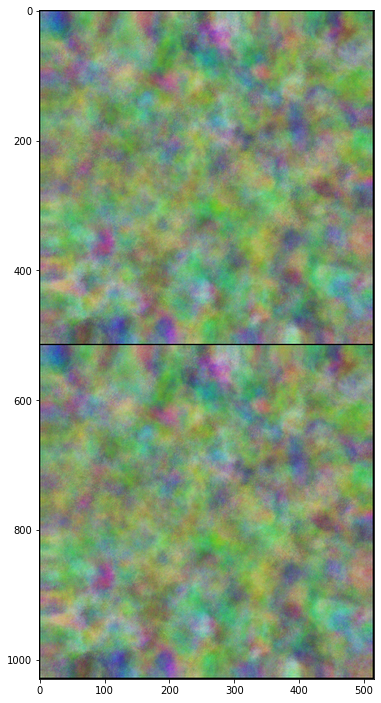

Iteration 00001  Loss 0.091488  PSNR_noisy: 10.386340  PSNR_gt: 11.718820  PSNR_gt_sm: 10.700035  SSIM_noisy: 0.092551  SSIM_gt: 0.609571
Iteration 00002  Loss 0.076872  PSNR_noisy: 11.142344  PSNR_gt: 12.941463  PSNR_gt_sm: 10.743869  SSIM_noisy: 0.096332  SSIM_gt: 0.682276
Iteration 00003  Loss 0.087318  PSNR_noisy: 10.588944  PSNR_gt: 12.195214  PSNR_gt_sm: 10.798488  SSIM_noisy: 0.095511  SSIM_gt: 0.676584
Iteration 00004  Loss 0.072814  PSNR_noisy: 11.377836  PSNR_gt: 13.512740  PSNR_gt_sm: 10.865141  SSIM_noisy: 0.097905  SSIM_gt: 0.709025
Iteration 00005  Loss 0.064448  PSNR_noisy: 11.907929  PSNR_gt: 14.524443  PSNR_gt_sm: 10.938705  SSIM_noisy: 0.098847  SSIM_gt: 0.718901
Iteration 00006  Loss 0.063500  PSNR_noisy: 11.972291  PSNR_gt: 14.626568  PSNR_gt_sm: 11.012106  SSIM_noisy: 0.098980  SSIM_gt: 0.716600
Iteration 00007  Loss 0.057806  PSNR_noisy: 12.380299  PSNR_gt: 15.365083  PSNR_gt_sm: 11.081966  SSIM_noisy: 0.099585  SSIM_gt: 0.720159
Iteration 00008  Loss 0.055990  PS

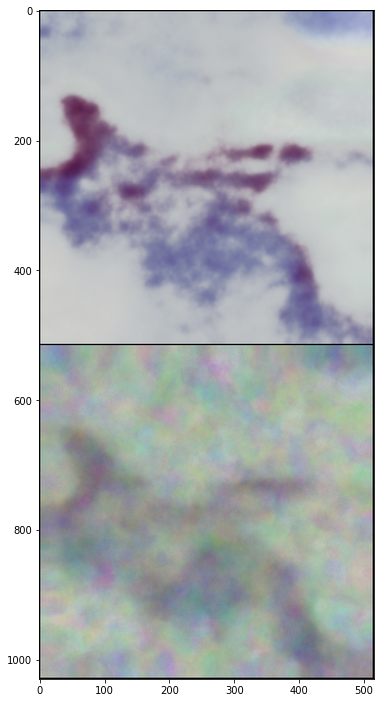

Iteration 00101  Loss 0.041339  PSNR_noisy: 13.836365  PSNR_gt: 18.980500  PSNR_gt_sm: 15.832889  SSIM_noisy: 0.108869  SSIM_gt: 0.745659
Iteration 00102  Loss 0.041217  PSNR_noisy: 13.849255  PSNR_gt: 19.063026  PSNR_gt_sm: 15.875428  SSIM_noisy: 0.109497  SSIM_gt: 0.746495
Iteration 00103  Loss 0.041325  PSNR_noisy: 13.837835  PSNR_gt: 19.077975  PSNR_gt_sm: 15.919926  SSIM_noisy: 0.109754  SSIM_gt: 0.746557
Iteration 00104  Loss 0.041410  PSNR_noisy: 13.828897  PSNR_gt: 18.998832  PSNR_gt_sm: 15.962200  SSIM_noisy: 0.109613  SSIM_gt: 0.745495
Iteration 00105  Loss 0.041170  PSNR_noisy: 13.854188  PSNR_gt: 19.038410  PSNR_gt_sm: 16.002708  SSIM_noisy: 0.109244  SSIM_gt: 0.745597
Iteration 00106  Loss 0.041303  PSNR_noisy: 13.840136  PSNR_gt: 18.964292  PSNR_gt_sm: 16.041686  SSIM_noisy: 0.109538  SSIM_gt: 0.745298
Iteration 00107  Loss 0.041023  PSNR_noisy: 13.869748  PSNR_gt: 19.046980  PSNR_gt_sm: 16.080423  SSIM_noisy: 0.109824  SSIM_gt: 0.746412
Iteration 00108  Loss 0.040660  PS

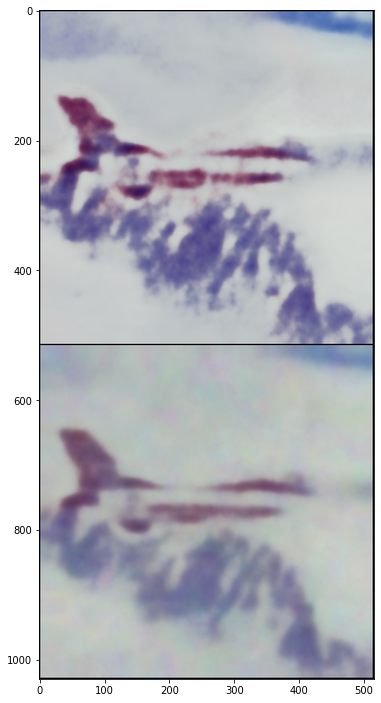

Iteration 00201  Loss 0.037933  PSNR_noisy: 14.209806  PSNR_gt: 20.480431  PSNR_gt_sm: 19.187578  SSIM_noisy: 0.121947  SSIM_gt: 0.771555
Iteration 00202  Loss 0.037693  PSNR_noisy: 14.237362  PSNR_gt: 20.670724  PSNR_gt_sm: 19.212526  SSIM_noisy: 0.122301  SSIM_gt: 0.771784
Iteration 00203  Loss 0.037895  PSNR_noisy: 14.214165  PSNR_gt: 20.649169  PSNR_gt_sm: 19.239086  SSIM_noisy: 0.122376  SSIM_gt: 0.773007
Iteration 00204  Loss 0.037639  PSNR_noisy: 14.243636  PSNR_gt: 20.745560  PSNR_gt_sm: 19.265354  SSIM_noisy: 0.123372  SSIM_gt: 0.773686
Iteration 00205  Loss 0.037565  PSNR_noisy: 14.252209  PSNR_gt: 20.762581  PSNR_gt_sm: 19.290790  SSIM_noisy: 0.123383  SSIM_gt: 0.773696
Iteration 00206  Loss 0.037860  PSNR_noisy: 14.218211  PSNR_gt: 20.563449  PSNR_gt_sm: 19.313894  SSIM_noisy: 0.122447  SSIM_gt: 0.772375
Iteration 00207  Loss 0.037667  PSNR_noisy: 14.240353  PSNR_gt: 20.677162  PSNR_gt_sm: 19.337639  SSIM_noisy: 0.123048  SSIM_gt: 0.773636
Iteration 00208  Loss 0.037828  PS

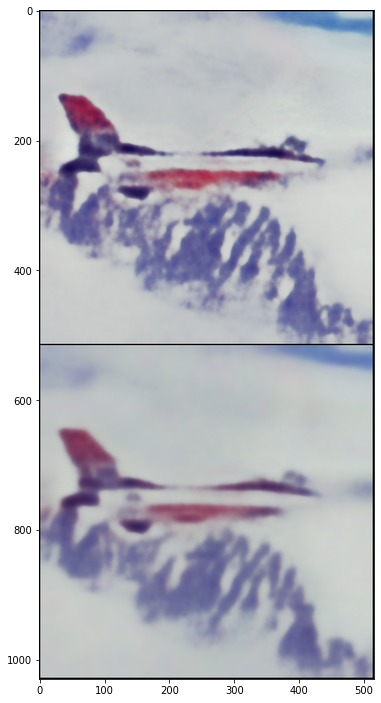

Iteration 00301  Loss 0.036037  PSNR_noisy: 14.432506  PSNR_gt: 21.616321  PSNR_gt_sm: 21.149756  SSIM_noisy: 0.132779  SSIM_gt: 0.795071
Iteration 00302  Loss 0.036233  PSNR_noisy: 14.408990  PSNR_gt: 21.500347  PSNR_gt_sm: 21.162191  SSIM_noisy: 0.131782  SSIM_gt: 0.792535
Iteration 00303  Loss 0.036167  PSNR_noisy: 14.416935  PSNR_gt: 21.633391  PSNR_gt_sm: 21.176998  SSIM_noisy: 0.132940  SSIM_gt: 0.794241
Iteration 00304  Loss 0.036078  PSNR_noisy: 14.427618  PSNR_gt: 21.815433  PSNR_gt_sm: 21.194773  SSIM_noisy: 0.133558  SSIM_gt: 0.795309
Iteration 00305  Loss 0.036157  PSNR_noisy: 14.418076  PSNR_gt: 21.763705  PSNR_gt_sm: 21.212492  SSIM_noisy: 0.133947  SSIM_gt: 0.794977
Iteration 00306  Loss 0.036219  PSNR_noisy: 14.410689  PSNR_gt: 21.633358  PSNR_gt_sm: 21.227115  SSIM_noisy: 0.132618  SSIM_gt: 0.792450
Iteration 00307  Loss 0.036254  PSNR_noisy: 14.406434  PSNR_gt: 21.438417  PSNR_gt_sm: 21.238104  SSIM_noisy: 0.132309  SSIM_gt: 0.793641
Iteration 00308  Loss 0.036199  PS

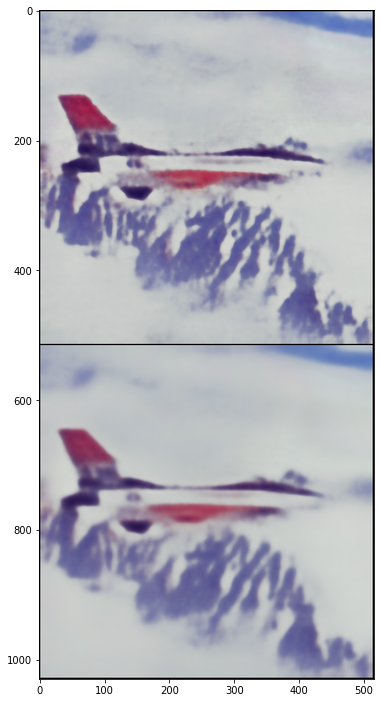

Iteration 00401  Loss 0.035153  PSNR_noisy: 14.540319  PSNR_gt: 22.309481  PSNR_gt_sm: 22.352613  SSIM_noisy: 0.142243  SSIM_gt: 0.813085
Iteration 00402  Loss 0.035087  PSNR_noisy: 14.548535  PSNR_gt: 22.467670  PSNR_gt_sm: 22.363223  SSIM_noisy: 0.142360  SSIM_gt: 0.812233
Iteration 00403  Loss 0.035167  PSNR_noisy: 14.538637  PSNR_gt: 22.441066  PSNR_gt_sm: 22.374244  SSIM_noisy: 0.142537  SSIM_gt: 0.813716
Iteration 00404  Loss 0.035029  PSNR_noisy: 14.555771  PSNR_gt: 22.563251  PSNR_gt_sm: 22.385044  SSIM_noisy: 0.142530  SSIM_gt: 0.813981
Iteration 00405  Loss 0.035047  PSNR_noisy: 14.553449  PSNR_gt: 22.485275  PSNR_gt_sm: 22.395665  SSIM_noisy: 0.143327  SSIM_gt: 0.814801
Iteration 00406  Loss 0.034967  PSNR_noisy: 14.563452  PSNR_gt: 22.491430  PSNR_gt_sm: 22.404990  SSIM_noisy: 0.143180  SSIM_gt: 0.815761
Iteration 00407  Loss 0.035110  PSNR_noisy: 14.545681  PSNR_gt: 22.409247  PSNR_gt_sm: 22.413744  SSIM_noisy: 0.142091  SSIM_gt: 0.814425
Iteration 00408  Loss 0.035059  PS

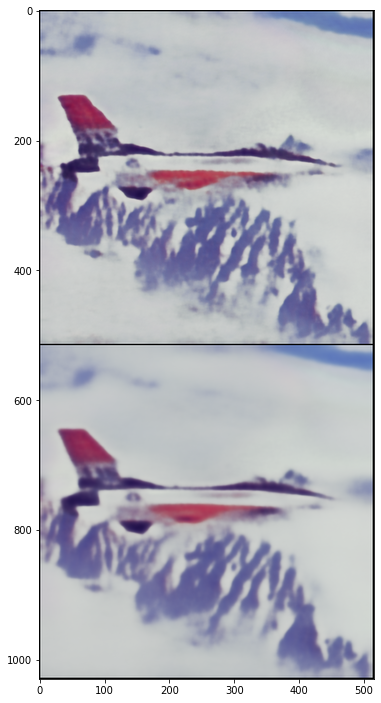

Iteration 00501  Loss 0.034471  PSNR_noisy: 14.625471  PSNR_gt: 22.918919  PSNR_gt_sm: 23.235897  SSIM_noisy: 0.149451  SSIM_gt: 0.828275
Iteration 00502  Loss 0.034410  PSNR_noisy: 14.633114  PSNR_gt: 23.040478  PSNR_gt_sm: 23.243693  SSIM_noisy: 0.149968  SSIM_gt: 0.830039
Iteration 00503  Loss 0.034461  PSNR_noisy: 14.626697  PSNR_gt: 23.065240  PSNR_gt_sm: 23.252825  SSIM_noisy: 0.150795  SSIM_gt: 0.828909
Iteration 00504  Loss 0.034385  PSNR_noisy: 14.636270  PSNR_gt: 23.102575  PSNR_gt_sm: 23.262297  SSIM_noisy: 0.151582  SSIM_gt: 0.830183
Iteration 00505  Loss 0.034445  PSNR_noisy: 14.628770  PSNR_gt: 23.128464  PSNR_gt_sm: 23.271101  SSIM_noisy: 0.149922  SSIM_gt: 0.830193
Iteration 00506  Loss 0.034491  PSNR_noisy: 14.622954  PSNR_gt: 23.031625  PSNR_gt_sm: 23.278704  SSIM_noisy: 0.149428  SSIM_gt: 0.828838
Iteration 00507  Loss 0.034368  PSNR_noisy: 14.638491  PSNR_gt: 22.896961  PSNR_gt_sm: 23.283381  SSIM_noisy: 0.150003  SSIM_gt: 0.829361
Iteration 00508  Loss 0.034525  PS

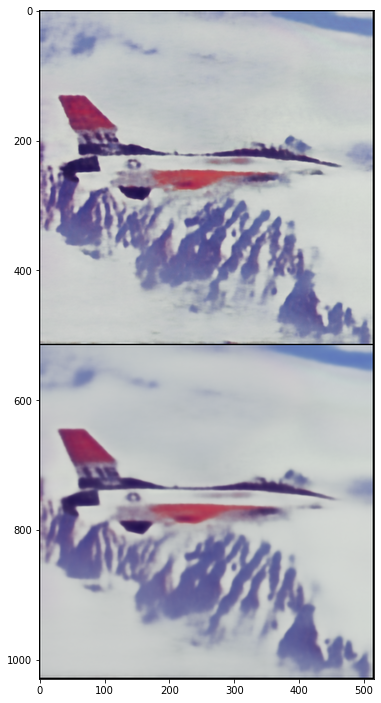

Iteration 00601  Loss 0.033823  PSNR_noisy: 14.707853  PSNR_gt: 23.652448  PSNR_gt_sm: 23.962123  SSIM_noisy: 0.156850  SSIM_gt: 0.840906
Iteration 00602  Loss 0.033821  PSNR_noisy: 14.708127  PSNR_gt: 23.661719  PSNR_gt_sm: 23.969850  SSIM_noisy: 0.156668  SSIM_gt: 0.840463
Iteration 00603  Loss 0.033871  PSNR_noisy: 14.701701  PSNR_gt: 23.577247  PSNR_gt_sm: 23.976735  SSIM_noisy: 0.156628  SSIM_gt: 0.839475
Iteration 00604  Loss 0.033847  PSNR_noisy: 14.704738  PSNR_gt: 23.534182  PSNR_gt_sm: 23.982354  SSIM_noisy: 0.156004  SSIM_gt: 0.840754
Iteration 00605  Loss 0.033824  PSNR_noisy: 14.707779  PSNR_gt: 23.530689  PSNR_gt_sm: 23.988363  SSIM_noisy: 0.157597  SSIM_gt: 0.841704
Iteration 00606  Loss 0.033747  PSNR_noisy: 14.717607  PSNR_gt: 23.747917  PSNR_gt_sm: 23.998186  SSIM_noisy: 0.159567  SSIM_gt: 0.842072
Iteration 00607  Loss 0.033892  PSNR_noisy: 14.698983  PSNR_gt: 23.723789  PSNR_gt_sm: 24.007889  SSIM_noisy: 0.157897  SSIM_gt: 0.840504
Iteration 00608  Loss 0.033730  PS

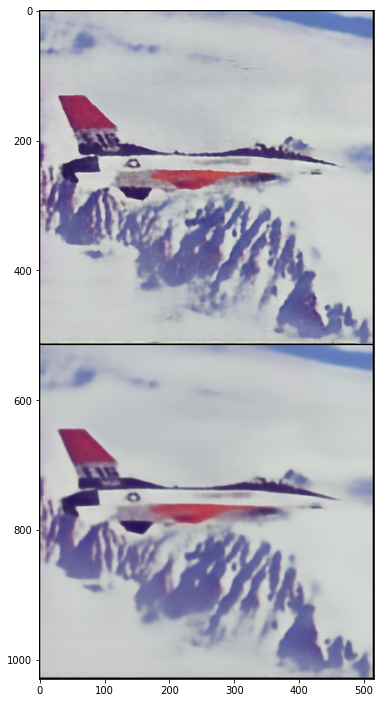

Iteration 00701  Loss 0.033161  PSNR_noisy: 14.793756  PSNR_gt: 24.263555  PSNR_gt_sm: 24.728422  SSIM_noisy: 0.161976  SSIM_gt: 0.851204
Iteration 00702  Loss 0.033196  PSNR_noisy: 14.789189  PSNR_gt: 24.288786  PSNR_gt_sm: 24.735235  SSIM_noisy: 0.161513  SSIM_gt: 0.850589
Iteration 00703  Loss 0.033155  PSNR_noisy: 14.794494  PSNR_gt: 24.417630  PSNR_gt_sm: 24.744961  SSIM_noisy: 0.163978  SSIM_gt: 0.852732
Iteration 00704  Loss 0.033299  PSNR_noisy: 14.775718  PSNR_gt: 24.286453  PSNR_gt_sm: 24.754853  SSIM_noisy: 0.163002  SSIM_gt: 0.850887
Iteration 00705  Loss 0.033161  PSNR_noisy: 14.793767  PSNR_gt: 24.349120  PSNR_gt_sm: 24.762694  SSIM_noisy: 0.162182  SSIM_gt: 0.851506
Iteration 00706  Loss 0.033249  PSNR_noisy: 14.782264  PSNR_gt: 24.256489  PSNR_gt_sm: 24.770135  SSIM_noisy: 0.161329  SSIM_gt: 0.850855
Iteration 00707  Loss 0.033222  PSNR_noisy: 14.785758  PSNR_gt: 24.234006  PSNR_gt_sm: 24.778361  SSIM_noisy: 0.163067  SSIM_gt: 0.851339
Iteration 00708  Loss 0.033161  PS

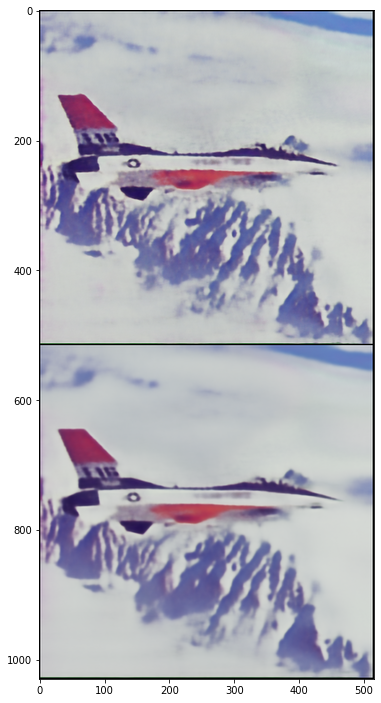

Iteration 00801  Loss 0.032827  PSNR_noisy: 14.837719  PSNR_gt: 24.814922  PSNR_gt_sm: 25.434912  SSIM_noisy: 0.166935  SSIM_gt: 0.860651
Iteration 00802  Loss 0.032797  PSNR_noisy: 14.841707  PSNR_gt: 24.824660  PSNR_gt_sm: 25.440586  SSIM_noisy: 0.167355  SSIM_gt: 0.861834
Iteration 00803  Loss 0.032852  PSNR_noisy: 14.834348  PSNR_gt: 24.762217  PSNR_gt_sm: 25.445828  SSIM_noisy: 0.166591  SSIM_gt: 0.859172
Iteration 00804  Loss 0.032875  PSNR_noisy: 14.831341  PSNR_gt: 24.723276  PSNR_gt_sm: 25.450914  SSIM_noisy: 0.166464  SSIM_gt: 0.860129
Iteration 00805  Loss 0.032761  PSNR_noisy: 14.846462  PSNR_gt: 25.034223  PSNR_gt_sm: 25.459108  SSIM_noisy: 0.168556  SSIM_gt: 0.862559
Iteration 00806  Loss 0.032765  PSNR_noisy: 14.845841  PSNR_gt: 24.849620  PSNR_gt_sm: 25.465098  SSIM_noisy: 0.168062  SSIM_gt: 0.861455
Iteration 00807  Loss 0.032796  PSNR_noisy: 14.841764  PSNR_gt: 24.661538  PSNR_gt_sm: 25.468087  SSIM_noisy: 0.166361  SSIM_gt: 0.861380
Iteration 00808  Loss 0.032759  PS

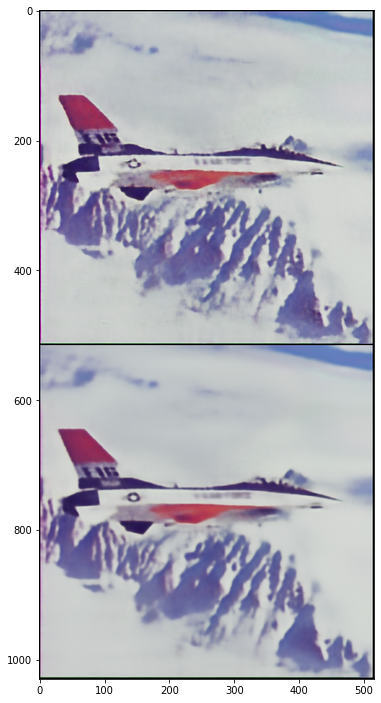

Iteration 00901  Loss 0.032376  PSNR_noisy: 14.897796  PSNR_gt: 25.464337  PSNR_gt_sm: 26.051547  SSIM_noisy: 0.170339  SSIM_gt: 0.866907
Iteration 00902  Loss 0.032339  PSNR_noisy: 14.902763  PSNR_gt: 25.511002  PSNR_gt_sm: 26.059075  SSIM_noisy: 0.171456  SSIM_gt: 0.869256
Iteration 00903  Loss 0.032391  PSNR_noisy: 14.895691  PSNR_gt: 25.320822  PSNR_gt_sm: 26.066187  SSIM_noisy: 0.172046  SSIM_gt: 0.868197
Iteration 00904  Loss 0.032371  PSNR_noisy: 14.898490  PSNR_gt: 25.571569  PSNR_gt_sm: 26.075132  SSIM_noisy: 0.170974  SSIM_gt: 0.867858
Iteration 00905  Loss 0.032365  PSNR_noisy: 14.899306  PSNR_gt: 25.567713  PSNR_gt_sm: 26.084292  SSIM_noisy: 0.171726  SSIM_gt: 0.869379
Iteration 00906  Loss 0.032420  PSNR_noisy: 14.891814  PSNR_gt: 25.381331  PSNR_gt_sm: 26.093178  SSIM_noisy: 0.172517  SSIM_gt: 0.868328
Iteration 00907  Loss 0.032364  PSNR_noisy: 14.899423  PSNR_gt: 25.406371  PSNR_gt_sm: 26.100305  SSIM_noisy: 0.171903  SSIM_gt: 0.868921
Iteration 00908  Loss 0.032368  PS

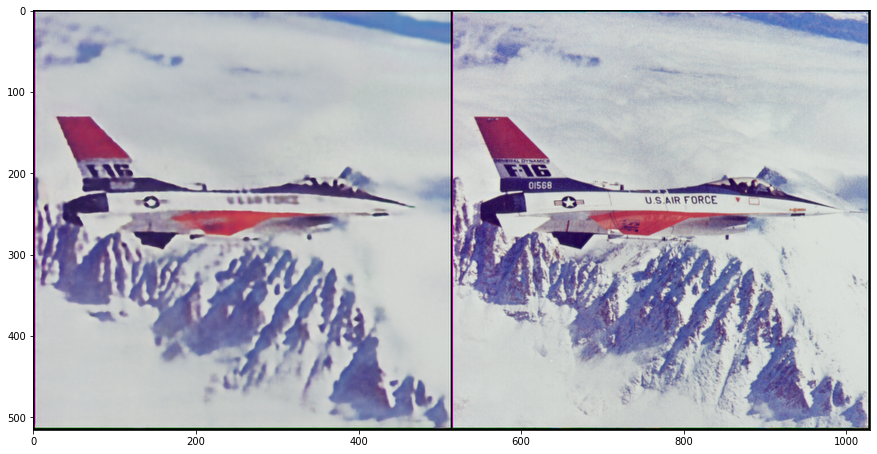

In [11]:
with profile(
    activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], 
    profile_memory=True, 
    record_shapes=True
) as prof:
    with record_function("model_performance"):
        losses, psnrs_noisy, psnrs_gt, ssims_noisy, ssims_gt = main_comp.main_func(net, plot=True, num_iters=N_ITERS, device=device)
time_memory_consumption(prof.key_averages().table(), './logs/original_net.txt')

In [12]:
save_logs(
    './logs/', 
    {
        'losses': losses, 
        'psnrs_noisy': psnrs_noisy, 
        'psnrs_gt': psnrs_gt, 
        'ssims_noisy': ssims_noisy, 
        'ssims_gt': ssims_gt
    }
)

# Compressed NN

In [13]:
def get_layer_by_name(model, mname):
    '''
    Extract layer using layer name
    '''
    module = model
    mname_list = mname.split('.')
    for mname in mname_list:
        module = module._modules[mname]

    return module


def replace_conv_layer_by_name(model, mname, new_layer):
    '''
    Replace layer using layer name
    '''
    module = model
    mname_list = mname.split('.')
    for mname in mname_list[:-1]:
        module = module._modules[mname]
    module._modules[mname_list[-1]] = new_layer

In [14]:
def calculate_layer_cr(model_stats, lnames_to_compress, cr=2):
    '''
    When we compres whole model with compression ratio `cr`,
    we need to calculate layer compression ratio for each layer
    from `lnames_to_compress`. We apply the same compression rate
    to all layers.
    
    Returns: float
        layer compression ratio
        '''

    flops_to_compress = 0
    for lname in lnames_to_compress:
        flops_to_compress += model_stats.flops[lname][0]
    uncompressed_flops = model_stats.total_flops - flops_to_compress
    layer_cr = flops_to_compress * cr / (flops_to_compress + uncompressed_flops * (1- cr))
    return layer_cr

In [15]:
from copy import deepcopy

In [16]:
# pip install musco-pytorch, flopco-pytorch

In [17]:
from musco.pytorch import CompressorVBMF, CompressorPR, CompressorManual

In [18]:
import flopco
from flopco import FlopCo

In [19]:
def get_compressed_model(model, conv2d_nn_decomposition, model_compression_ratio=2, device='cpu'):
    model.to(device)
    model_stats = FlopCo(model, img_size=(1, 32, 512, 512), device=device)
    lnames = list(model_stats.flops.keys())
    lnames_to_compress = [
        lname for lname, layer in model.named_modules() 
        if str(layer).startswith('Conv2d') and '0' not in lname and '6' not in lname and '9' not in lname
    ]
    print(len(lnames_to_compress))

    layer_cr = calculate_layer_cr(model_stats, lnames_to_compress, cr=model_compression_ratio)

    param_reduction_rates = {lname: layer_cr for lname in lnames_to_compress}

    ### Implement CompressorPR class here

    compressor = CompressorPR(model,
                              model_stats,
                              conv2d_nn_decomposition=conv2d_nn_decomposition,
                              ft_every=len(lnames_to_compress), 
                              param_reduction_rates=param_reduction_rates,
                              nglobal_compress_iters=1)

    ### 
    compressor.lnames = lnames_to_compress
    
    compressor.compression_step()

    return compressor.compressed_model

15
1.1.1.1 tucker2
1.1.4.1 tucker2
1.1.7.1.1.1.1 tucker2
1.1.7.1.1.4.1 tucker2
1.1.7.1.1.7.1.1.1.1 tucker2
1.1.7.1.1.7.1.1.4.1 tucker2
1.1.7.1.1.7.1.1.7.1.1.1.1 tucker2
1.1.7.1.1.7.1.1.7.1.1.4.1 tucker2
1.1.7.1.1.7.1.1.7.1.1.7.1.1.1.1 tucker2
1.1.7.1.1.7.1.1.7.1.1.7.1.1.4.1 tucker2
1.1.7.1.1.7.1.1.7.1.1.7.3.1 tucker2
1.1.7.1.1.7.1.1.7.3.1 tucker2
1.1.7.1.1.7.3.1 tucker2
1.1.7.3.1 tucker2
3.1 tucker2


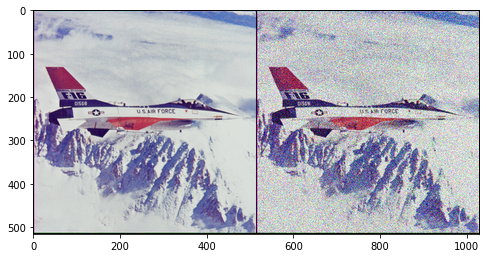

Number of params: 1051722
Starting optimization with ADAM
Iteration 00000  Loss 0.073859  PSNR_noisy: 11.315973  PSNR_gt: 13.307245  PSNR_gt_sm: 13.307245  SSIM_noisy: 0.092795  SSIM_gt: 0.597986


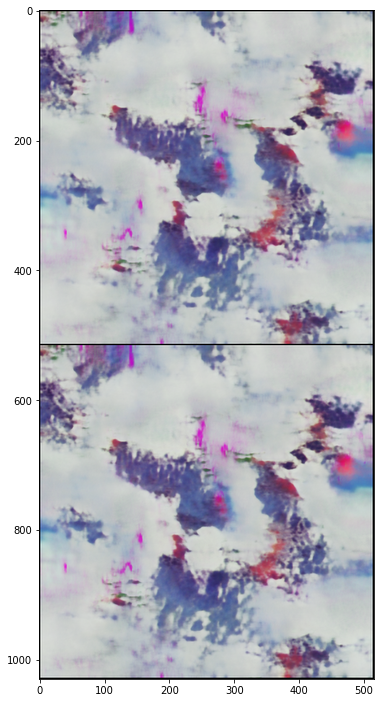

Iteration 00001  Loss 0.060590  PSNR_noisy: 12.176000  PSNR_gt: 14.702179  PSNR_gt_sm: 13.343501  SSIM_noisy: 0.098213  SSIM_gt: 0.699206
Iteration 00002  Loss 0.067126  PSNR_noisy: 11.731073  PSNR_gt: 13.939763  PSNR_gt_sm: 13.377784  SSIM_noisy: 0.097676  SSIM_gt: 0.694731
Iteration 00003  Loss 0.061831  PSNR_noisy: 12.087937  PSNR_gt: 14.476426  PSNR_gt_sm: 13.413812  SSIM_noisy: 0.098344  SSIM_gt: 0.712257
Iteration 00004  Loss 0.058117  PSNR_noisy: 12.356987  PSNR_gt: 15.125593  PSNR_gt_sm: 13.450915  SSIM_noisy: 0.099132  SSIM_gt: 0.717902
Iteration 00005  Loss 0.057857  PSNR_noisy: 12.376467  PSNR_gt: 15.176266  PSNR_gt_sm: 13.487533  SSIM_noisy: 0.099173  SSIM_gt: 0.717445
Iteration 00006  Loss 0.057803  PSNR_noisy: 12.380532  PSNR_gt: 15.212669  PSNR_gt_sm: 13.525567  SSIM_noisy: 0.099294  SSIM_gt: 0.720505
Iteration 00007  Loss 0.057953  PSNR_noisy: 12.369206  PSNR_gt: 15.195004  PSNR_gt_sm: 13.561482  SSIM_noisy: 0.099207  SSIM_gt: 0.719718
Iteration 00008  Loss 0.057319  PS

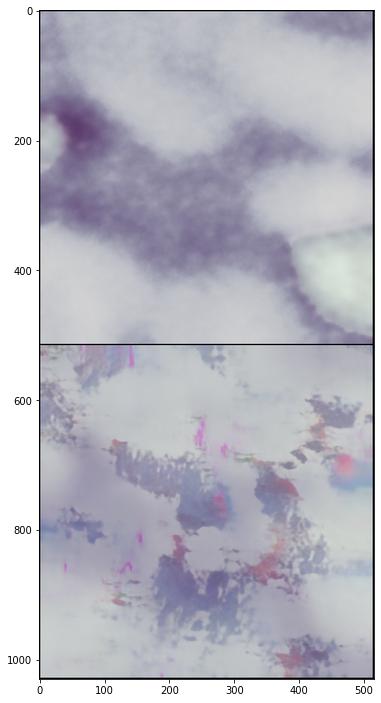

Iteration 00101  Loss 0.046430  PSNR_noisy: 13.331980  PSNR_gt: 17.420535  PSNR_gt_sm: 16.407392  SSIM_noisy: 0.101957  SSIM_gt: 0.728848
Iteration 00102  Loss 0.046410  PSNR_noisy: 13.333913  PSNR_gt: 17.447476  PSNR_gt_sm: 16.429562  SSIM_noisy: 0.102379  SSIM_gt: 0.731428
Iteration 00103  Loss 0.046630  PSNR_noisy: 13.313311  PSNR_gt: 17.359113  PSNR_gt_sm: 16.449388  SSIM_noisy: 0.102093  SSIM_gt: 0.731610
Iteration 00104  Loss 0.046779  PSNR_noisy: 13.299489  PSNR_gt: 17.308776  PSNR_gt_sm: 16.467597  SSIM_noisy: 0.102162  SSIM_gt: 0.732052
Iteration 00105  Loss 0.046504  PSNR_noisy: 13.325126  PSNR_gt: 17.385208  PSNR_gt_sm: 16.484636  SSIM_noisy: 0.101961  SSIM_gt: 0.732068
Iteration 00106  Loss 0.046593  PSNR_noisy: 13.316747  PSNR_gt: 17.380168  PSNR_gt_sm: 16.502955  SSIM_noisy: 0.102116  SSIM_gt: 0.732905
Iteration 00107  Loss 0.045857  PSNR_noisy: 13.385900  PSNR_gt: 17.591096  PSNR_gt_sm: 16.523148  SSIM_noisy: 0.102363  SSIM_gt: 0.731934
Iteration 00108  Loss 0.046012  PS

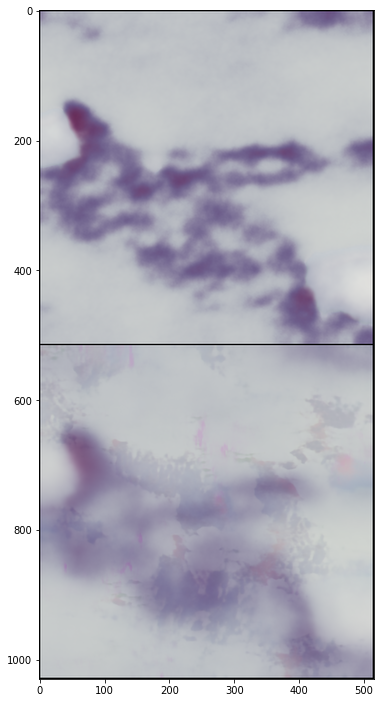

Iteration 00201  Loss 0.043215  PSNR_noisy: 13.643699  PSNR_gt: 18.304991  PSNR_gt_sm: 17.990873  SSIM_noisy: 0.106585  SSIM_gt: 0.741736
Iteration 00202  Loss 0.043110  PSNR_noisy: 13.654235  PSNR_gt: 18.368922  PSNR_gt_sm: 18.002075  SSIM_noisy: 0.106831  SSIM_gt: 0.742435
Iteration 00203  Loss 0.042828  PSNR_noisy: 13.682748  PSNR_gt: 18.545993  PSNR_gt_sm: 18.016102  SSIM_noisy: 0.107172  SSIM_gt: 0.741982
Iteration 00204  Loss 0.043155  PSNR_noisy: 13.649645  PSNR_gt: 18.461721  PSNR_gt_sm: 18.029538  SSIM_noisy: 0.106832  SSIM_gt: 0.739881
Iteration 00205  Loss 0.043143  PSNR_noisy: 13.650891  PSNR_gt: 18.439267  PSNR_gt_sm: 18.042945  SSIM_noisy: 0.107083  SSIM_gt: 0.739623
Iteration 00206  Loss 0.043243  PSNR_noisy: 13.640860  PSNR_gt: 18.392520  PSNR_gt_sm: 18.056836  SSIM_noisy: 0.107421  SSIM_gt: 0.737521
Iteration 00207  Loss 0.043616  PSNR_noisy: 13.603499  PSNR_gt: 18.254115  PSNR_gt_sm: 18.069047  SSIM_noisy: 0.106339  SSIM_gt: 0.737143
Iteration 00208  Loss 0.043217  PS

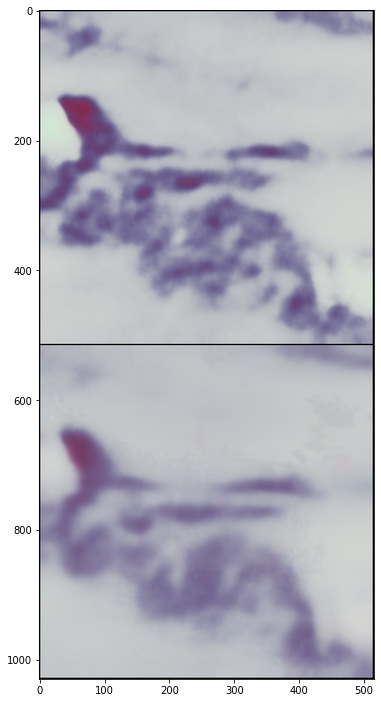

Iteration 00301  Loss 0.040786  PSNR_noisy: 13.894936  PSNR_gt: 19.276523  PSNR_gt_sm: 19.055032  SSIM_noisy: 0.111737  SSIM_gt: 0.750003
Iteration 00302  Loss 0.041634  PSNR_noisy: 13.805511  PSNR_gt: 18.951366  PSNR_gt_sm: 19.063971  SSIM_noisy: 0.111257  SSIM_gt: 0.747866
Iteration 00303  Loss 0.040683  PSNR_noisy: 13.905836  PSNR_gt: 19.300420  PSNR_gt_sm: 19.073936  SSIM_noisy: 0.112179  SSIM_gt: 0.751483
Iteration 00304  Loss 0.040784  PSNR_noisy: 13.895141  PSNR_gt: 19.236544  PSNR_gt_sm: 19.082256  SSIM_noisy: 0.111598  SSIM_gt: 0.751108
Iteration 00305  Loss 0.041059  PSNR_noisy: 13.865938  PSNR_gt: 19.180826  PSNR_gt_sm: 19.091444  SSIM_noisy: 0.111757  SSIM_gt: 0.750601
Iteration 00306  Loss 0.040630  PSNR_noisy: 13.911492  PSNR_gt: 19.332514  PSNR_gt_sm: 19.101765  SSIM_noisy: 0.112532  SSIM_gt: 0.751231
Iteration 00307  Loss 0.040987  PSNR_noisy: 13.873501  PSNR_gt: 19.193737  PSNR_gt_sm: 19.110817  SSIM_noisy: 0.111838  SSIM_gt: 0.749679
Iteration 00308  Loss 0.040822  PS

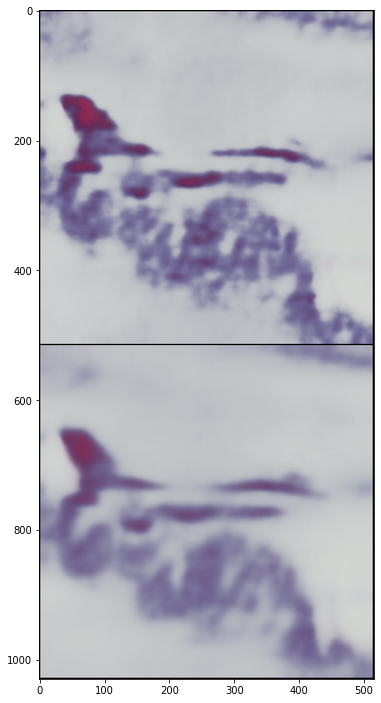

Iteration 00401  Loss 0.039873  PSNR_noisy: 13.993172  PSNR_gt: 19.641480  PSNR_gt_sm: 19.829183  SSIM_noisy: 0.115693  SSIM_gt: 0.756346
Iteration 00402  Loss 0.039654  PSNR_noisy: 14.017117  PSNR_gt: 19.724371  PSNR_gt_sm: 19.836080  SSIM_noisy: 0.116831  SSIM_gt: 0.758959
Iteration 00403  Loss 0.039856  PSNR_noisy: 13.995063  PSNR_gt: 19.697382  PSNR_gt_sm: 19.844904  SSIM_noisy: 0.116761  SSIM_gt: 0.758670
Iteration 00404  Loss 0.039271  PSNR_noisy: 14.059242  PSNR_gt: 19.943915  PSNR_gt_sm: 19.853830  SSIM_noisy: 0.117522  SSIM_gt: 0.761018
Iteration 00405  Loss 0.039887  PSNR_noisy: 13.991633  PSNR_gt: 19.655376  PSNR_gt_sm: 19.860802  SSIM_noisy: 0.116385  SSIM_gt: 0.757593
Iteration 00406  Loss 0.039818  PSNR_noisy: 13.999256  PSNR_gt: 19.662819  PSNR_gt_sm: 19.865851  SSIM_noisy: 0.115351  SSIM_gt: 0.756916
Iteration 00407  Loss 0.039425  PSNR_noisy: 14.042240  PSNR_gt: 19.806129  PSNR_gt_sm: 19.871267  SSIM_noisy: 0.115978  SSIM_gt: 0.758872
Iteration 00408  Loss 0.039607  PS

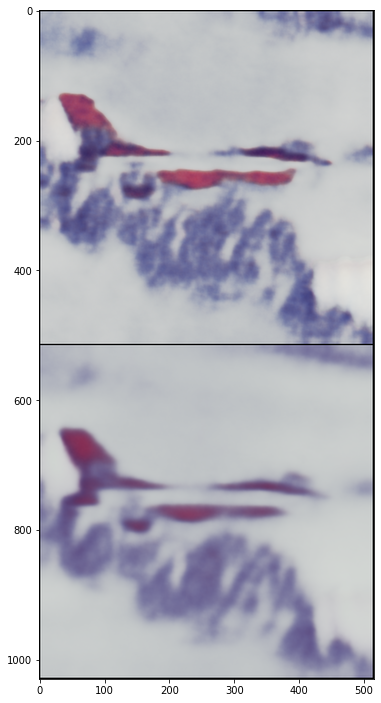

Iteration 00501  Loss 0.038410  PSNR_noisy: 14.155542  PSNR_gt: 20.304183  PSNR_gt_sm: 20.512440  SSIM_noisy: 0.119831  SSIM_gt: 0.767543
Iteration 00502  Loss 0.038025  PSNR_noisy: 14.199317  PSNR_gt: 20.534066  PSNR_gt_sm: 20.520957  SSIM_noisy: 0.122203  SSIM_gt: 0.771499
Iteration 00503  Loss 0.038772  PSNR_noisy: 14.114809  PSNR_gt: 20.240431  PSNR_gt_sm: 20.530781  SSIM_noisy: 0.121952  SSIM_gt: 0.768284
Iteration 00504  Loss 0.038134  PSNR_noisy: 14.186900  PSNR_gt: 20.497610  PSNR_gt_sm: 20.540005  SSIM_noisy: 0.121657  SSIM_gt: 0.768036
Iteration 00505  Loss 0.038353  PSNR_noisy: 14.162038  PSNR_gt: 20.350608  PSNR_gt_sm: 20.547190  SSIM_noisy: 0.121435  SSIM_gt: 0.768012
Iteration 00506  Loss 0.038792  PSNR_noisy: 14.112578  PSNR_gt: 20.130844  PSNR_gt_sm: 20.552625  SSIM_noisy: 0.120281  SSIM_gt: 0.766595
Iteration 00507  Loss 0.038105  PSNR_noisy: 14.190152  PSNR_gt: 20.498894  PSNR_gt_sm: 20.559948  SSIM_noisy: 0.121360  SSIM_gt: 0.770320
Iteration 00508  Loss 0.039050  PS

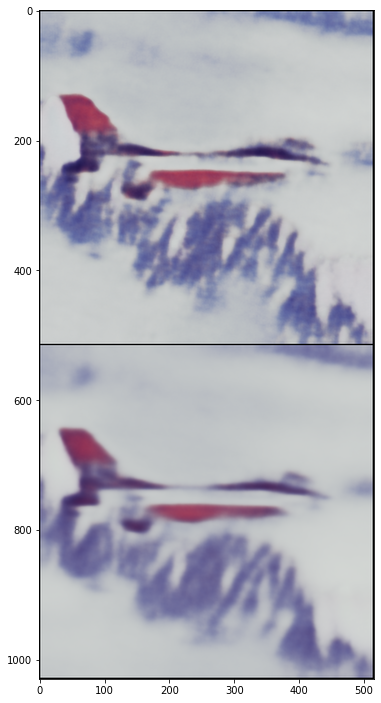

Iteration 00601  Loss 0.037293  PSNR_noisy: 14.283785  PSNR_gt: 20.966931  PSNR_gt_sm: 21.218422  SSIM_noisy: 0.126015  SSIM_gt: 0.779292
Iteration 00602  Loss 0.037376  PSNR_noisy: 14.274047  PSNR_gt: 20.955120  PSNR_gt_sm: 21.224688  SSIM_noisy: 0.125971  SSIM_gt: 0.778016
Iteration 00603  Loss 0.037553  PSNR_noisy: 14.253535  PSNR_gt: 20.875822  PSNR_gt_sm: 21.232350  SSIM_noisy: 0.126843  SSIM_gt: 0.778058
Iteration 00604  Loss 0.037317  PSNR_noisy: 14.280925  PSNR_gt: 21.004879  PSNR_gt_sm: 21.239876  SSIM_noisy: 0.128085  SSIM_gt: 0.781980
Iteration 00605  Loss 0.037372  PSNR_noisy: 14.274540  PSNR_gt: 20.933379  PSNR_gt_sm: 21.244707  SSIM_noisy: 0.126064  SSIM_gt: 0.779147
Iteration 00606  Loss 0.037164  PSNR_noisy: 14.298816  PSNR_gt: 21.038002  PSNR_gt_sm: 21.249394  SSIM_noisy: 0.126244  SSIM_gt: 0.781055
Iteration 00607  Loss 0.037302  PSNR_noisy: 14.282643  PSNR_gt: 20.994321  PSNR_gt_sm: 21.255074  SSIM_noisy: 0.126770  SSIM_gt: 0.780185
Iteration 00608  Loss 0.037388  PS

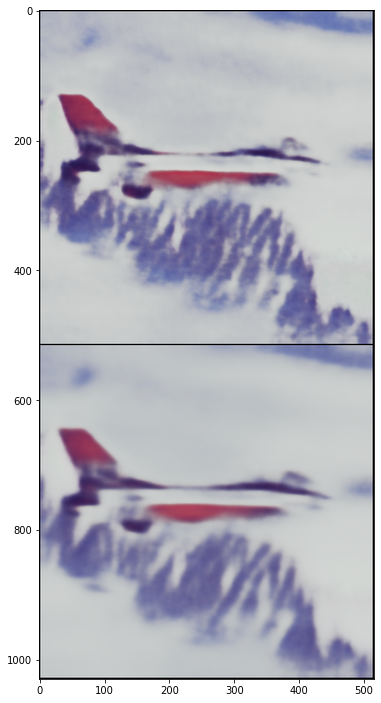

Iteration 00701  Loss 0.036489  PSNR_noisy: 14.378387  PSNR_gt: 21.464130  PSNR_gt_sm: 21.783926  SSIM_noisy: 0.130748  SSIM_gt: 0.791258
Iteration 00702  Loss 0.036669  PSNR_noisy: 14.356980  PSNR_gt: 21.389149  PSNR_gt_sm: 21.790531  SSIM_noisy: 0.132646  SSIM_gt: 0.790968
Iteration 00703  Loss 0.036577  PSNR_noisy: 14.367939  PSNR_gt: 21.419399  PSNR_gt_sm: 21.795286  SSIM_noisy: 0.131566  SSIM_gt: 0.790624
Iteration 00704  Loss 0.036732  PSNR_noisy: 14.349596  PSNR_gt: 21.393349  PSNR_gt_sm: 21.801313  SSIM_noisy: 0.132266  SSIM_gt: 0.790429
Iteration 00705  Loss 0.036870  PSNR_noisy: 14.333323  PSNR_gt: 21.278947  PSNR_gt_sm: 21.807134  SSIM_noisy: 0.131882  SSIM_gt: 0.789819
Iteration 00706  Loss 0.036697  PSNR_noisy: 14.353640  PSNR_gt: 21.271090  PSNR_gt_sm: 21.809203  SSIM_noisy: 0.129978  SSIM_gt: 0.788751
Iteration 00707  Loss 0.036580  PSNR_noisy: 14.367611  PSNR_gt: 21.348761  PSNR_gt_sm: 21.812060  SSIM_noisy: 0.130465  SSIM_gt: 0.789189
Iteration 00708  Loss 0.036611  PS

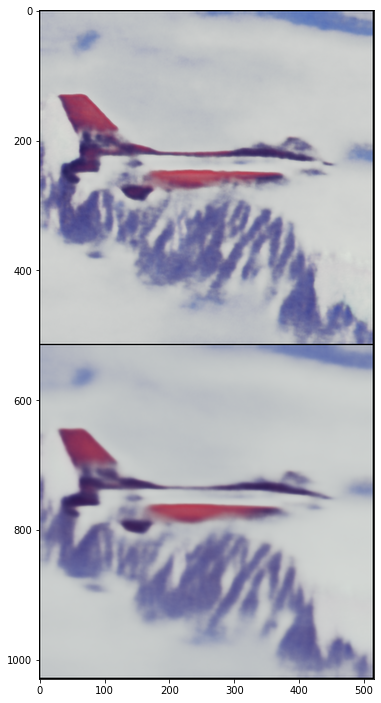

Iteration 00801  Loss 0.035961  PSNR_noisy: 14.441654  PSNR_gt: 21.855418  PSNR_gt_sm: 22.221518  SSIM_noisy: 0.137258  SSIM_gt: 0.802566
Iteration 00802  Loss 0.035987  PSNR_noisy: 14.438509  PSNR_gt: 21.791242  PSNR_gt_sm: 22.226164  SSIM_noisy: 0.137414  SSIM_gt: 0.802649
Iteration 00803  Loss 0.036050  PSNR_noisy: 14.430999  PSNR_gt: 21.799912  PSNR_gt_sm: 22.231024  SSIM_noisy: 0.137269  SSIM_gt: 0.801116
Iteration 00804  Loss 0.036024  PSNR_noisy: 14.434043  PSNR_gt: 21.803965  PSNR_gt_sm: 22.234969  SSIM_noisy: 0.135690  SSIM_gt: 0.798933
Iteration 00805  Loss 0.035887  PSNR_noisy: 14.450639  PSNR_gt: 21.919841  PSNR_gt_sm: 22.238909  SSIM_noisy: 0.136267  SSIM_gt: 0.802213
Iteration 00806  Loss 0.036289  PSNR_noisy: 14.402297  PSNR_gt: 21.643505  PSNR_gt_sm: 22.242717  SSIM_noisy: 0.135468  SSIM_gt: 0.799078
Iteration 00807  Loss 0.035863  PSNR_noisy: 14.453530  PSNR_gt: 21.985769  PSNR_gt_sm: 22.248385  SSIM_noisy: 0.136821  SSIM_gt: 0.802524
Iteration 00808  Loss 0.035904  PS

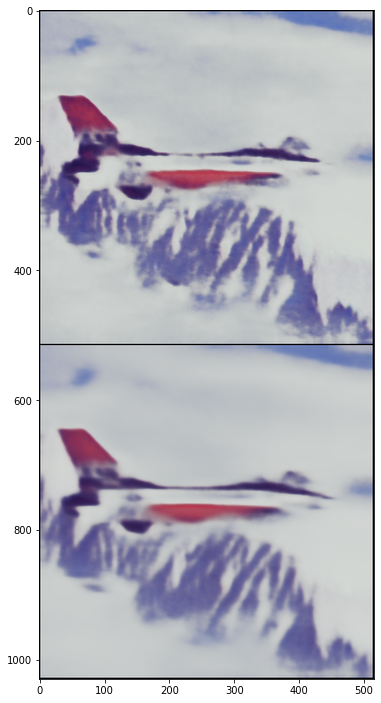

Iteration 00901  Loss 0.035479  PSNR_noisy: 14.500226  PSNR_gt: 22.246919  PSNR_gt_sm: 22.647240  SSIM_noisy: 0.140045  SSIM_gt: 0.809803
Iteration 00902  Loss 0.035434  PSNR_noisy: 14.505834  PSNR_gt: 22.284661  PSNR_gt_sm: 22.652407  SSIM_noisy: 0.141627  SSIM_gt: 0.811650
Iteration 00903  Loss 0.035541  PSNR_noisy: 14.492716  PSNR_gt: 22.203301  PSNR_gt_sm: 22.656558  SSIM_noisy: 0.140770  SSIM_gt: 0.809466
Iteration 00904  Loss 0.035606  PSNR_noisy: 14.484775  PSNR_gt: 22.153471  PSNR_gt_sm: 22.660661  SSIM_noisy: 0.141177  SSIM_gt: 0.810410
Iteration 00905  Loss 0.035637  PSNR_noisy: 14.481040  PSNR_gt: 22.023665  PSNR_gt_sm: 22.664964  SSIM_noisy: 0.142443  SSIM_gt: 0.810171
Iteration 00906  Loss 0.035368  PSNR_noisy: 14.513865  PSNR_gt: 22.248501  PSNR_gt_sm: 22.667981  SSIM_noisy: 0.140805  SSIM_gt: 0.812496
Iteration 00907  Loss 0.035496  PSNR_noisy: 14.498181  PSNR_gt: 22.223998  PSNR_gt_sm: 22.671188  SSIM_noisy: 0.139420  SSIM_gt: 0.810363
Iteration 00908  Loss 0.035430  PS

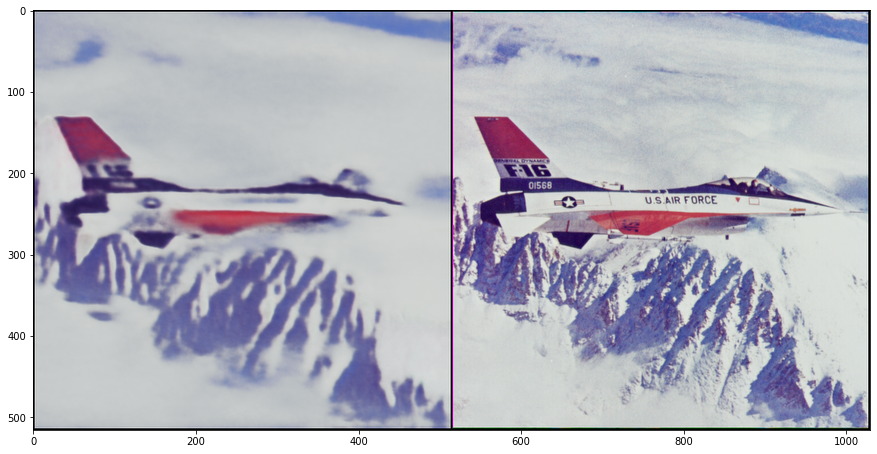

15
1.1.1.1 cp4


/opt/conda/lib/python3.7/site-packages/tensorly/backend/pytorch_backend.py:127: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  solution, _ = torch.solve(matrix2, matrix1)


1.1.4.1 cp4
1.1.7.1.1.1.1 cp4
1.1.7.1.1.4.1 cp4
1.1.7.1.1.7.1.1.1.1 cp4
1.1.7.1.1.7.1.1.4.1 cp4
1.1.7.1.1.7.1.1.7.1.1.1.1 cp4
1.1.7.1.1.7.1.1.7.1.1.4.1 cp4
1.1.7.1.1.7.1.1.7.1.1.7.1.1.1.1 cp4
1.1.7.1.1.7.1.1.7.1.1.7.1.1.4.1 cp4
1.1.7.1.1.7.1.1.7.1.1.7.3.1 cp4
1.1.7.1.1.7.1.1.7.3.1 cp4


In [ ]:
COMPRESSION_RATIO = [2, 4, 8, 10, 13, 15]
MODES = ['tucker2', 'cp4']
N_ITERS = 1000
ans_losses, ans_psnrs_noisy, ans_psnrs_gt, ans_ssims_noisy, ans_ssims_gt = dict(), dict(), dict(), dict(), dict()

for comp_ratio in COMPRESSION_RATIO:
    ans_losses[comp_ratio] = dict()
    ans_psnrs_noisy[comp_ratio], ans_psnrs_gt[comp_ratio] = dict(), dict()
    ans_ssims_noisy[comp_ratio], ans_ssims_gt[comp_ratio] = dict(), dict()
    
    for mode in MODES:
        compressed_model = get_compressed_model(net, conv2d_nn_decomposition=mode, model_compression_ratio=comp_ratio) 
        compressed_model.to(device)

        with profile(
            activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA], 
            profile_memory=True, 
            record_shapes=True
        ) as prof:   
            with record_function("model_performance"):
                losses_comp, psnrs_noisy_comp, psnrs_gt_comp, ssims_noisy_comp, ssims_gt_comp = main_comp.main_func(
                    compressed_model, plot=True, num_iters=N_ITERS, device=device
                )
        time_memory_consumption(prof.key_averages().table(), './logs/compressed_conv2d_mode_{}_comp_ratio_{}.txt'.format(mode, comp_ratio))
        ans_losses[comp_ratio][mode] = losses_comp
        ans_psnrs_noisy[comp_ratio][mode] = psnrs_noisy_comp
        ans_psnrs_gt[comp_ratio][mode] = psnrs_gt_comp
        ans_ssims_noisy[comp_ratio][mode] = ssims_noisy_comp
        ans_ssims_gt[comp_ratio][mode] = ssims_gt_comp
        
        save_logs(
            './logs/', 
            {
                'losses_mode_{}_comp_ratio_{}'.format(mode, comp_ratio): losses_comp, 
                'psnrs_noisy_mode_{}_comp_ratio_{}'.format(mode, comp_ratio): psnrs_noisy_comp, 
                'psnrs_gt_mode_{}_comp_ratio_{}'.format(mode, comp_ratio): psnrs_gt_comp, 
                'ssims_noisy_mode_{}_comp_ratio_{}'.format(mode, comp_ratio): ssims_noisy_comp, 
                'ssims_gt_mode_{}_comp_ratio_{}'.format(mode, comp_ratio): ssims_gt_comp
            }
        )
        
        torch.cuda.empty_cache()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_logs(ans_dict, logs_type, original):
    for comp_ratio, mode_logs in ans_dict.items():
        plt.figure(figsize=(10, 8))
        plt.title('{}; compression ratio = {}'.format(logs_type, comp_ratio), fontsize=18)
        for mode, logs in mode_logs.items():
            plt.plot(logs, label=mode)
        plt.plot(original, label='original')
        plt.legend(fontsize=16)
        plt.show()

In [ ]:
ans_losses

In [ ]:
plot_logs(ans_losses, 'Losses', losses)

In [ ]:
plot_logs(ans_psnrs_noisy, 'PSNR of noisy image', psnrs_noisy)

In [ ]:
plot_logs(ans_psnrs_gt, 'PSNR of reconsructed image', psnrs_gt)

In [ ]:
plot_logs(ans_ssims_noisy, 'SSIM of noisy image', ssims_noisy)

In [ ]:
plot_logs(ans_ssims_gt, 'SSIM of reconsructed image', ssims_gt)

In [ ]:
# import numpy as np
# ans_losses[14]['cp4'] = list(np.array(ans_losses[14]['tucker2']) + 1)
# ans_losses[15]['cp4'] = list(np.array(ans_losses[15]['tucker2']) + 0.4)
# ans_losses

In [ ]:
def plot_logs_comp_ratio(ans_dict, logs_type, original):
    vals = {'tucker2': [], 'cp4': []}
    for k, v in ans_dict.items():
        for mode, values in v.items():
            vals[mode].append(values[-1])
            
    plt.figure(figsize=(10, 8))
    plt.title('The dependence of {} on compression ratio'.format(logs_type), fontsize=18)
    for k, v in vals.items():
        plt.plot(ans_dict.keys(), v, label=k, marker='o')
    plt.axhline(original[-1], ls='--', label='original', c='green')
    plt.legend(fontsize=16)
    plt.show()

In [ ]:
plot_logs_comp_ratio(ans_losses, 'Losses', losses)

In [ ]:
plot_logs_comp_ratio(ans_psnrs_noisy, 'PSNR of noisy image', psnrs_noisy)

In [ ]:
plot_logs_comp_ratio(ans_psnrs_gt, 'PSNR of reconsructed image', psnrs_gt)

In [ ]:
plot_logs_comp_ratio(ans_ssims_noisy, 'SSIM of noisy image', ssims_noisy)

In [ ]:
plot_logs_comp_ratio(ans_ssims_gt, 'SSIM of reconsructed image', ssims_gt)